In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_cleaner import *
%matplotlib inline

In [2]:
box_office_gross = pd.read_csv('bom.movie_gross.csv')
name_basics = pd.read_csv('name.basics.csv')
rt_info = pd.read_csv('rt.movie_info.tsv', delimiter='\t')
rt_reviews = pd.read_csv('rt.reviews.tsv', delimiter='\t', encoding = 'unicode_escape')
alt_title_names = pd.read_csv('title.akas.csv')
title_basics = pd.read_csv('title.basics.csv')
title_crew = pd.read_csv('title.crew.csv')
title_principals = pd.read_csv('title.principals.csv')
title_ratings = pd.read_csv('title.ratings.csv')
tmdb_movies = pd.read_csv('tmdb.movies.csv')
movie_budgets = pd.read_csv('tn.movie_budgets.csv')

# Question 1: Average voter rating and popularity vs gross
## merge movie_budgets with tmdb.movies
popularity is a weighted score based on number of searches, number of votes and number of times added to a watchlist

In [3]:
tmdb_movies.head(10)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [4]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
movie_budgets.rename(columns={'movie': 'title'}, inplace=True)

In [6]:
movie_budgets.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [7]:
movie_financials_and_popularity = pd.merge(movie_budgets, tmdb_movies, on='title')

In [8]:
movie_financials_and_popularity.head()

,id_x,release_date_x,title,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,vote_average,vote_count
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,7.4,18676
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571
2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457
3,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948
4,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",20623,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,6.2,7510


In [9]:
movie_financials_and_popularity.drop(columns=['genre_ids', 'original_title',
                                              'id_x', 'original_language', 'release_date_y', 'Unnamed: 0'], inplace=True)
movie_financials_and_popularity.rename(columns={'release_date_x': 'release_date'}, inplace=True)
movie_financials_and_popularity.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,id_y,popularity,vote_average,vote_count
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",19995,26.526,7.4,18676
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",1865,30.579,6.4,8571
2,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",99861,44.383,7.3,13457
3,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",299536,80.773,8.3,13948
4,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",141052,34.953,6.2,7510


In [10]:
movie_financials_and_popularity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2385 entries, 0 to 2384
Data columns (total 9 columns):
release_date         2385 non-null object
title                2385 non-null object
production_budget    2385 non-null object
domestic_gross       2385 non-null object
worldwide_gross      2385 non-null object
id_y                 2385 non-null int64
popularity           2385 non-null float64
vote_average         2385 non-null float64
vote_count           2385 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 186.3+ KB


In [11]:
money_values_to_integer(movie_financials_and_popularity, 'production_budget')
money_values_to_integer(movie_financials_and_popularity, 'domestic_gross')
money_values_to_integer(movie_financials_and_popularity, 'worldwide_gross')

,release_date,title,production_budget,domestic_gross,worldwide_gross,id_y,popularity,vote_average,vote_count
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,19995,26.526,7.4,18676
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1865,30.579,6.4,8571
2,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,99861,44.383,7.3,13457
3,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,299536,80.773,8.3,13948
4,"Nov 17, 2017",Justice League,300000000,229024295,655945209,141052,34.953,6.2,7510
...,...,...,...,...,...,...,...,...,...
2380,"Sep 1, 2015",Exeter,25000,0,489792,226458,5.934,4.7,121
2381,"Apr 21, 2015",Ten,25000,0,0,279516,1.575,5.4,5
2382,"Dec 31, 2014",Dry Spell,22000,0,0,255266,0.600,6.0,1
2383,"Jan 4, 2013",All Superheroes Must Die,20000,0,0,86304,2.078,3.9,19


In [12]:
movie_financials_and_popularity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2385 entries, 0 to 2384
Data columns (total 9 columns):
release_date         2385 non-null object
title                2385 non-null object
production_budget    2385 non-null int64
domestic_gross       2385 non-null int64
worldwide_gross      2385 non-null int64
id_y                 2385 non-null int64
popularity           2385 non-null float64
vote_average         2385 non-null float64
vote_count           2385 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 186.3+ KB


In [13]:
movie_financials_and_popularity.sort_values(by=['popularity'], ascending=False)

,release_date,title,production_budget,domestic_gross,worldwide_gross,id_y,popularity,vote_average,vote_count
3,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,299536,80.773,8.3,13948
880,"Oct 24, 2014",John Wick,30000000,43037835,76235001,245891,78.123,7.2,10081
17,"Dec 17, 2014",The Hobbit: The Battle of the Five Armies,250000000,255119788,945577621,122917,53.783,7.3,8392
20,"May 4, 2012",The Avengers,225000000,623279547,1517935897,24428,50.289,7.6,19673
21,"Aug 14, 1998",The Avengers,60000000,23385416,48585416,24428,50.289,7.6,19673
...,...,...,...,...,...,...,...,...,...
2063,"Jan 18, 2008",Teeth,2000000,347578,2350641,366912,0.600,5.0,1
1554,"Aug 7, 2015",The Gift,5000000,43787265,58978477,384205,0.600,5.8,6
2247,"Mar 4, 2016",They Will Have to Kill Us First,600000,0,7943,324322,0.600,5.0,1
2250,"Sep 12, 2014",Faith Connections,550000,9111,9111,211086,0.600,4.2,3


In [14]:
movie_financials_and_popularity['worldwide_gross'].value_counts()

0            210
44793168       7
385997896      7
95127344       5
34356760       5
            ... 
465195589      1
5466698        1
65532491       1
2636           1
60282876       1
Name: worldwide_gross, Length: 1804, dtype: int64

In [15]:
movies_to_remove = movie_financials_and_popularity.loc[movie_financials_and_popularity['worldwide_gross'] == 0]
movies_to_remove.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,id_y,popularity,vote_average,vote_count
45,"Jul 28, 1951",Alice in Wonderland,3000000,0,0,12155,22.020,6.6,8713
46,"Jul 28, 1951",Alice in Wonderland,3000000,0,0,423971,0.600,6.0,1
193,"Jun 5, 2009",Home,12000000,0,0,79580,1.823,5.4,11
194,"Jun 5, 2009",Home,12000000,0,0,237303,0.840,7.0,2
195,"Jun 5, 2009",Home,12000000,0,0,228161,12.835,6.8,2372


In [16]:
movie_financials_and_popularity.drop(index=movies_to_remove.index, inplace=True)
movie_financials_and_popularity['worldwide_gross'].value_counts()

385997896    7
44793168     7
95127344     5
58978477     5
42425450     5
            ..
5466698      1
65532491     1
2636         1
378505812    1
76347393     1
Name: worldwide_gross, Length: 1803, dtype: int64

In [17]:
movie_financials_and_popularity['weighted_vote_total'] =(movie_financials_and_popularity['vote_average']
                                                         * movie_financials_and_popularity['vote_count']) // 1

In [18]:
movie_financials_and_popularity.sort_values(by='worldwide_gross', inplace=True)
movie_financials_and_popularity.drop_duplicates(subset='id_y', inplace=True)

In [19]:
movie_financials_and_popularity['id_y'].value_counts()

71679     1
378200    1
113947    1
10559     1
49520     1
         ..
289450    1
268896    1
301748    1
86709     1
335874    1
Name: id_y, Length: 1938, dtype: int64

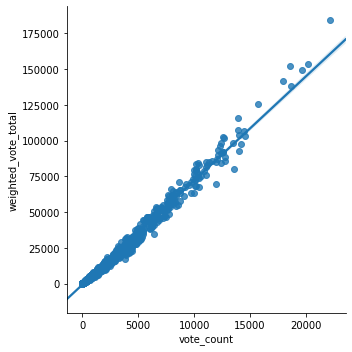

In [21]:
sns.lmplot(x='vote_count', y='weighted_vote_total', data=movie_financials_and_popularity)